<a href="https://colab.research.google.com/github/necatidogrul/xai/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veriyi oku


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RandomForestClassifier
Random Forest Classifier Confusion Matrix
[[4424   13    5]
 [   6 1065   12]
 [   6    8  845]]
	
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       0.98      0.98      0.98      1083
           2       0.98      0.98      0.98       859

    accuracy                           0.99      6384
   macro avg       0.99      0.99      0.99      6384
weighted avg       0.99      0.99      0.99      6384

RandomForestClassifier Accuracy: 0.9921679197994987


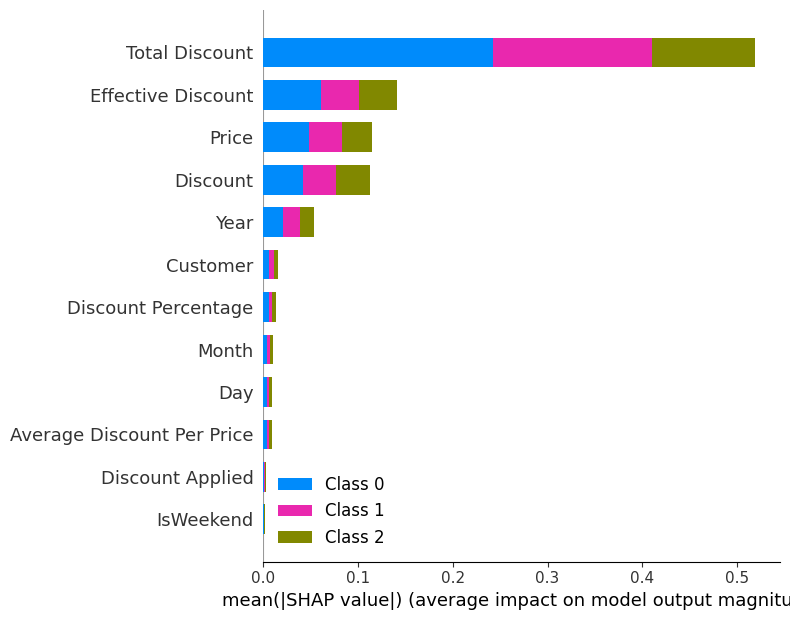

------------------------------------------------------------------------
XGBOOST
XGBoost Classifier Confusion Matrix:
[[4423    9   10]
 [  12 1061   10]
 [  12   10  837]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4442
           1       0.98      0.98      0.98      1083
           2       0.98      0.97      0.98       859

    accuracy                           0.99      6384
   macro avg       0.98      0.98      0.98      6384
weighted avg       0.99      0.99      0.99      6384

XGBoost Accuracy: 0.9901 	


[13:58:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


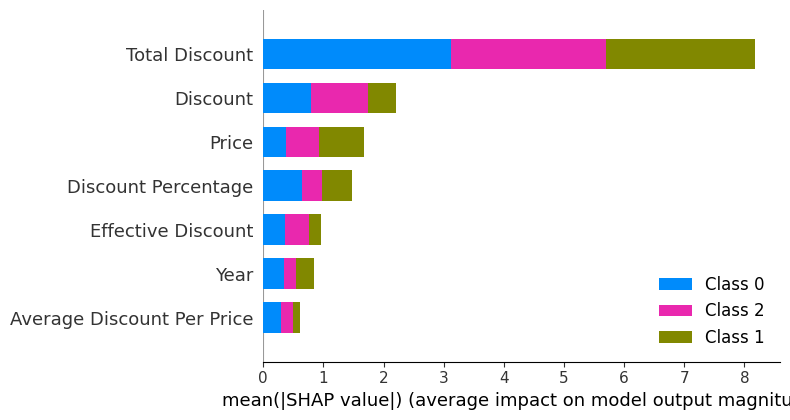

------------------------------------------------------------------------
CatBoost
0:	learn: 0.9526005	test: 0.9522544	best: 0.9522544 (0)	total: 22.4ms	remaining: 22.4s
100:	learn: 0.0688098	test: 0.0720628	best: 0.0720628 (100)	total: 1.41s	remaining: 12.6s
200:	learn: 0.0422182	test: 0.0488493	best: 0.0488493 (200)	total: 3.71s	remaining: 14.7s
300:	learn: 0.0327182	test: 0.0420757	best: 0.0420757 (300)	total: 6.28s	remaining: 14.6s
400:	learn: 0.0267584	test: 0.0381791	best: 0.0381791 (400)	total: 7.49s	remaining: 11.2s
500:	learn: 0.0228528	test: 0.0360062	best: 0.0360001 (495)	total: 8.66s	remaining: 8.63s
600:	learn: 0.0197659	test: 0.0344509	best: 0.0344167 (594)	total: 10s	remaining: 6.64s
700:	learn: 0.0174416	test: 0.0331662	best: 0.0331506 (699)	total: 11.2s	remaining: 4.78s
800:	learn: 0.0154769	test: 0.0322765	best: 0.0322765 (800)	total: 12.4s	remaining: 3.08s
900:	learn: 0.0141650	test: 0.0318690	best: 0.0318533 (894)	total: 13.6s	remaining: 1.49s
999:	learn: 0.0131408	t

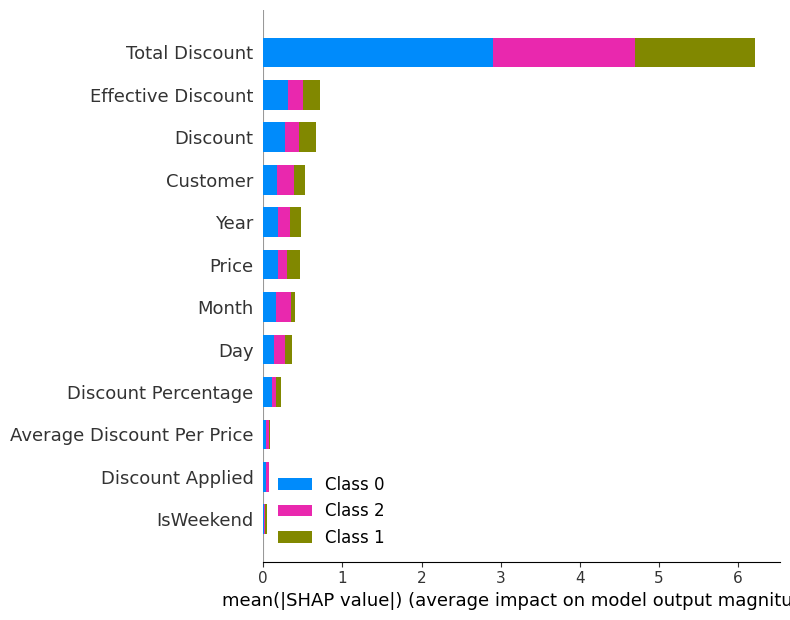

------------------------------------------------------------------------
Müşteri 0: En az satılan ürünleri alıyor, Yüksek alım sıklığına sahip, Yüksek fiyatları alma eğiliminde, Ayın ortasında satın alıyor, Yüksek harcama yapma eğiliminde, indirim olunca alışveriş yapıyor
En çok satın aldığı SKU: 1570, 2292, 1648, ve en çok alışverişi yılın Ekim ayında yapmaktadır.

Müşteri 1: En çok satılan ürünlerden alıyor, Yüksek alım sıklığına sahip, Yüksek fiyatları alma eğiliminde, Ayın ortasında satın alıyor, Yüksek harcama yapma eğiliminde, indirim olunca alışveriş yapıyor
En çok satın aldığı SKU: 868, 1310, 2505, ve en çok alışverişi yılın Temmuz ayında yapmaktadır.

Müşteri 2: En çok satılan ürünlerden alıyor, Yüksek alım sıklığına sahip, Yüksek fiyatları alma eğiliminde, Ayın ortasında satın alıyor, Düşük harcama yapma eğiliminde, indirim olunca alışveriş yapıyor
En çok satın aldığı SKU: 166, 1827, 538, ve en çok alışverişi yılın Haziran ayında yapmaktadır.

Müşteri 3: En az satılan ürünler

In [ ]:
 !pip install shap
!pip install xgboost
!pip install catboost
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/drive/MyDrive/file_out.csv')

#Veri önişleme
# 100'den az satılanlar silindi
sold_count = data.groupby("SKU")["Quantity"].sum()
low_sold = sold_count[sold_count < 100]
data = data[~data["SKU"].isin(low_sold.index)]

#Unnamed silindi
data = data.drop(columns=['Unnamed: 0'])

#Negatif discount
data = data[data['Discount'] >= 0]
data = data.dropna()

#Total Discount
data['Total Discount'] = data['Discount'] * data['Quantity']

#Average Discount Per Price
data['Average Discount Per Price'] = data['Discount'] / data['Price']

#Discount Percentage
data['Discount Percentage'] = (data['Discount'] / data['Price']) * 100

#Effective Discount
data['Effective Discount'] = data['Price'] - data['Discount']

#Discount Applied
data['Discount Applied'] = data['Discount'].apply(lambda x: 1 if x > 0 else 0)

#Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Ay, yıl, gün
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

#Haftasonu mu?
data['IsWeekend'] = data['Date'].dt.dayofweek.isin([5, 6]).astype(int)

#Quantity segmentasyon
def classify_quantity(row):
    if row['Quantity'] > 10:
        return 'Yüksek'
    elif row['Quantity'] > 5:
        return 'Orta'
    else:
        return 'Düşük'

data['QuantityClass'] = data.apply(classify_quantity, axis=1)

label_encoder = LabelEncoder()
data['QuantityClassEncoded'] = label_encoder.fit_transform(data['QuantityClass'])

# NaN ve sonsuz değerleri sil
data = data.replace([np.inf, -np.inf], np.nan)
data.dropna(inplace=True)

#-------------------------------------------------------------------------------
#RandomForestClassifier
print("RandomForestClassifier")
X = data[['Price', 'Discount', 'Customer', 'Discount Percentage', 'Effective Discount', 'Discount Applied', 'Year', 'Month', 'Day', 'IsWeekend','Total Discount','Average Discount Per Price']]
y = data['QuantityClassEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Değerlendirme metrikleri
print('Random Forest Classifier Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\t')
print("Classification Report")
print(classification_report(y_test, y_pred))
accuracy_rf = np.mean(y_pred == y_test)
print("RandomForestClassifier Accuracy:", accuracy_rf)

# SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

print("------------------------------------------------------------------------")
print("XGBOOST")

X = data[['Price', 'Discount', 'Discount Percentage', 'Effective Discount', 'Year','Total Discount','Average Discount Per Price']]
y = data['QuantityClassEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Grid ile buldum
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=1.0
)

xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)

# Metrikler
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

print("XGBoost Classifier Confusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"XGBoost Accuracy: {accuracy:.4f} \t")

# SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

print("------------------------------------------------------------------------")
print("CatBoost")

X = data[['Price', 'Discount', 'Customer', 'Discount Percentage', 'Effective Discount', 'Discount Applied', 'Year', 'Month', 'Day', 'IsWeekend','Total Discount','Average Discount Per Price']]
y = data['QuantityClassEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass')
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)
y_pred = model.predict(X_test)

#Değerlendirme metrikleri
print("CatBoost Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Accuracy: {accuracy:.4f}")

#SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

print("------------------------------------------------------------------------")

# Satın alma davranışları çıktıları!
aylar = {
    1: 'Ocak',
    2: 'Şubat',
    3: 'Mart',
    4: 'Nisan',
    5: 'Mayıs',
    6: 'Haziran',
    7: 'Temmuz',
    8: 'Ağustos',
    9: 'Eylül',
    10: 'Ekim',
    11: 'Kasım',
    12: 'Aralık'
}

sorted_customers = sorted(data['Customer'].unique())
total_discounts = data['Discount'].sum()

for customer in sorted_customers:
    customer_data = data[data['Customer'] == customer]

    product_sales_count = customer_data['SKU'].value_counts()
    preferred_product = customer_data['SKU'].value_counts().idxmax()
    responded_to_discount = customer_data['Discount'].sum() > 0

    if product_sales_count[preferred_product] >= 3:
        preference = 'En çok satılan ürünlerden alıyor'
    else:
        preference = 'En az satılan ürünleri alıyor'

    purchase_dates = data[data['Customer'] == customer]['Date']

    if len(purchase_dates) >= 2:
        purchase_frequency = (purchase_dates.max() - purchase_dates.min()).days / (len(purchase_dates) - 1)
        if purchase_frequency < 10:
            purchase_frequency_category = 'Düşük alım sıklığına sahip'
        elif 10 <= purchase_frequency < 20:
            purchase_frequency_category = 'Orta alım sıklığına sahip'
        else:
            purchase_frequency_category = 'Yüksek alım sıklığına sahip'
    else:
        purchase_frequency_category = 'Düşük alım sıklığına sahip'

    price_range = data[data['Customer'] == customer]['Price'].max() - data[data['Customer'] == customer]['Price'].min()

    if price_range < 50:
        price_sensitivity = "Düşük fiyatları alma eğiliminde"
    elif 50 <= price_range < 200:
        price_sensitivity = 'Orta fiyatları alma eğiliminde'
    else:
        price_sensitivity = 'Yüksek fiyatları alma eğiliminde'

    purchase_dates = pd.to_datetime(purchase_dates)
    mid_of_month = purchase_dates.dt.day.between(10, 20)
    beginning_of_month = purchase_dates.dt.day.between(1, 10)
    end_of_month = purchase_dates.dt.day.between(21, purchase_dates.dt.days_in_month)

    purchase_timing = ''
    if mid_of_month.sum() >= beginning_of_month.sum() and mid_of_month.sum() >= end_of_month.sum():
        purchase_timing = 'Ayın ortasında satın alıyor'
    elif beginning_of_month.sum() >= mid_of_month.sum() and beginning_of_month.sum() >= end_of_month.sum():
        purchase_timing = 'Ayın başında satın alıyor'
    else:
        purchase_timing = 'Ayın sonunda satın alıyor'

    average_spending = data[data['Customer'] == customer]['Price'].mean()

    if average_spending >= 1000:
        spending_segment = 'Yüksek harcama yapma eğiliminde'
    else:
        spending_segment = 'Düşük harcama yapma eğiliminde'

    top_3_skus = product_sales_count.head(3).index.tolist()
    top_3_skus = [str(sku) for sku in top_3_skus]

    if responded_to_discount:
        discount_response = 'indirim olunca alışveriş yapıyor'
    else:
        discount_response = 'indirimleri önemsemeden alışveriş yapıyor'

    purchase_dates = pd.to_datetime(customer_data['Date'])
    monthly_purchase_counts = purchase_dates.dt.month.value_counts()
    most_active_month = monthly_purchase_counts.idxmax()
    month_name = aylar[most_active_month]

    print(f'Müşteri {customer}: {preference}, {purchase_frequency_category}, {price_sensitivity}, {purchase_timing}, {spending_segment}, {discount_response}')
    print(f'En çok satın aldığı SKU: {", ".join(top_3_skus)}, ve en çok alışverişi yılın {month_name} ayında yapmaktadır.\n')

